### **Análise e Resolução da Atividade 3**

**Disciplina:** Ciência de Dados
**Atividade:** Preparação e Limpeza de Dados

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **1. Leitura e Inspeção Inicial dos Dados**

Primeiramente, vamos carregar o conjunto de dados e fazer uma inspeção inicial para entender sua estrutura, os tipos de dados, e a presença de valores nulos ou duplicados.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
# O separador é ';', e o decimal é ',', então especificamos esses parâmetros
df = pd.read_csv('/content/drive/MyDrive/atividade3_dataset.csv', sep=';', decimal=',')

# Exibindo as 5 primeiras linhas para entender a estrutura
print("Cabeçalho do DataFrame:")
display(df.head())

# Verificando os tipos de dados e a contagem de nulos
print("\nInformações do DataFrame:")
df.info()

# Verificando a quantidade de linhas duplicadas
print(f"\nNúmero de linhas duplicadas: {df.duplicated().sum()}")

Cabeçalho do DataFrame:


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           510 non-null    int64 
 1   Nome         510 non-null    object
 2   Idade        489 non-null    object
 3   Cidade       510 non-null    object
 4   Produto      510 non-null    object
 5   Preço        473 non-null    object
 6   Quantidade   510 non-null    int64 
 7   Data_Compra  510 non-null    object
dtypes: int64(2), object(6)
memory usage: 32.0+ KB

Número de linhas duplicadas: 8


**Observações da Inspeção Inicial:**
* **Tipos de Dados:** A coluna `Preço` foi lida como `object` (texto) devido ao uso da vírgula como separador decimal, que já corrigimos na leitura com `decimal=','`. A coluna `Data_Compra` também é do tipo `object` e precisará ser convertida para o tipo data.
* **Valores Ausentes:** As colunas `Idade` e `Preço` possuem valores nulos.
* **Duplicados:** Existem 5 linhas duplicadas no conjunto de dados.

---
#### **2. Tratamento de Valores Ausentes**

Agora, vamos aplicar estratégias para tratar os valores ausentes nas colunas `Idade` e `Preço`.

**Estratégia:**

* **Coluna `Idade`:** Preencher os valores ausentes com a **mediana** das idades. A mediana é mais robusta a outliers do que a média, sendo uma escolha mais segura para dados de idade que podem ter valores extremos.
* **Coluna `Preço`:** Remover as linhas onde o preço é nulo. O preço é uma informação crucial para qualquer análise de vendas. Preenchê-lo com um valor (média, mediana) poderia distorcer as análises financeiras. Como a quantidade de nulos é pequena em relação ao total, a remoção é a abordagem mais segura.

In [8]:
# Tratando a coluna 'Idade'
# Preenchendo valores nulos com a mediana
# Convertendo a coluna 'Idade' para numérica, tratando erros
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')
mediana_idade = df['Idade'].median()
df['Idade'] = df['Idade'].fillna(mediana_idade)
print(f"Valores nulos em 'Idade' preenchidos com a mediana: {mediana_idade}")

# Tratando a coluna 'Preço'
# Removendo as linhas onde o preço é nulo
df.dropna(subset=['Preço'], inplace=True)
print("Linhas com valor de 'Preço' nulo foram removidas.")

# Verificando novamente as informações para confirmar o tratamento
print("\nInformações do DataFrame após tratamento de nulos:")
df.info()

Valores nulos em 'Idade' preenchidos com a mediana: 44.0
Linhas com valor de 'Preço' nulo foram removidas.

Informações do DataFrame após tratamento de nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           473 non-null    int64  
 1   Nome         473 non-null    object 
 2   Idade        473 non-null    float64
 3   Cidade       473 non-null    object 
 4   Produto      473 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   473 non-null    int64  
 7   Data_Compra  473 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.3+ KB


---
#### **3. Detecção e Remoção de Duplicados**

Com os valores ausentes tratados, o próximo passo é remover as linhas duplicadas para garantir a integridade dos dados.

In [9]:
# Removendo as linhas duplicadas
df.drop_duplicates(inplace=True)
print(f"Linhas duplicadas foram removidas. Novo número de duplicados: {df.duplicated().sum()}")

Linhas duplicadas foram removidas. Novo número de duplicados: 0


---
#### **4. Correções Adicionais**

Nesta etapa, vamos padronizar os dados e corrigir os tipos de colunas.

**Ações:**

* **Padronizar `Cidade`:** Converter todos os nomes de cidades para letras maiúsculas para evitar inconsistências como "CURITIBA" e "curitiba".
* **Converter `Data_Compra`:** Converter a coluna de `object` (texto) para o formato `datetime`, o que permitirá análises temporais.

In [10]:
# Padronizando a coluna 'Cidade' para maiúsculas
df['Cidade'] = df['Cidade'].str.upper()
print("Coluna 'Cidade' padronizada para maiúsculas.")
print("Valores únicos na coluna 'Cidade' após padronização:")
print(df['Cidade'].unique())

# Convertendo a coluna 'Data_Compra' para o tipo datetime
df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], format='%d-%m-%Y')
print("\nColuna 'Data_Compra' convertida para datetime.")

# Verificando os tipos de dados novamente para confirmar as correções
print("\nTipos de dados após correções:")
df.info()

Coluna 'Cidade' padronizada para maiúsculas.
Valores únicos na coluna 'Cidade' após padronização:
['FORTALEZA' 'RIO DE JANEIRO' 'CURITIBA' 'SALVADOR' 'PORTO ALEGRE'
 'SÃO PAULO' 'MANAUS' 'BELO HORIZONTE']

Coluna 'Data_Compra' convertida para datetime.

Tipos de dados após correções:
<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 0 to 508
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           465 non-null    int64         
 1   Nome         465 non-null    object        
 2   Idade        465 non-null    float64       
 3   Cidade       465 non-null    object        
 4   Produto      465 non-null    object        
 5   Preço        465 non-null    object        
 6   Quantidade   465 non-null    int64         
 7   Data_Compra  465 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 32.7+ KB


---
#### **5. Exploração Inicial Após Limpeza**

Com o dataset limpo, podemos realizar uma exploração inicial para extrair insights.

##### **Estatísticas Descritivas**

Vamos calcular as principais estatísticas descritivas para as colunas numéricas.

In [11]:
# Exibindo estatísticas descritivas
print("Estatísticas Descritivas do DataFrame Limpo:")
display(df.describe())

Estatísticas Descritivas do DataFrame Limpo:


,ID,Idade,Quantidade,Data_Compra
count,465.000000,465.000000,465.000000,465
mean,252.505376,44.182796,5.819355,2024-04-27 03:12:00
min,1.000000,18.000000,1.000000,2022-12-04 00:00:00
25%,130.000000,32.000000,3.000000,2023-09-05 00:00:00
50%,252.000000,44.000000,6.000000,2024-04-18 00:00:00
75%,377.000000,57.000000,8.000000,2024-12-25 00:00:00
max,500.000000,70.000000,10.000000,2025-08-28 00:00:00
std,143.955065,15.155335,2.831026,NaN


##### **Desafio: Criando uma Nova Coluna**

Vamos criar uma nova coluna chamada `Valor_Total_Compra`, que será o resultado da multiplicação do `Preço` pela `Quantidade`.

In [12]:
# Criando a coluna 'Valor_Total_Compra'
df['Valor_Total_Compra'] = df['Preço'] * df['Quantidade']
print("Nova coluna 'Valor_Total_Compra' criada.")
display(df.head())

Nova coluna 'Valor_Total_Compra' criada.


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra,Valor_Total_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,2024-05-30,"2010,872010,872010,872010,872010,872010,872010,87"
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10,3619.293619.29
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,2022-12-31,40415.940415.940415.940415.940415.940415.94041...
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,2023-09-14,716.66716.66716.66716.66716.66716.66716.66716.66
5,6,Mariana,18.0,SALVADOR,Headset,2388.44,8,2024-02-23,2388.442388.442388.442388.442388.442388.442388...


##### **Gráficos para Análise**

Agora, vamos criar dois gráficos para visualizar a distribuição dos dados e a correlação entre as variáveis.

**1. Histograma da Idade dos Clientes**
Este gráfico mostrará a distribuição de frequência das idades dos clientes.

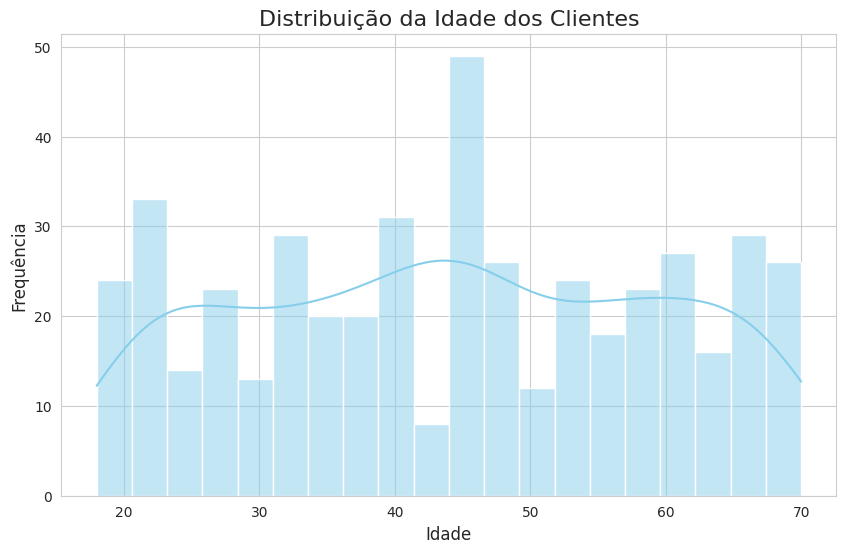

In [13]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")

# Gráfico 1: Histograma da Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade dos Clientes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.savefig('histograma_idade.png')
plt.show()

**2. Gráfico de Correlação (Heatmap)**
Este gráfico mostrará a correlação entre as variáveis numéricas do nosso conjunto de dados.

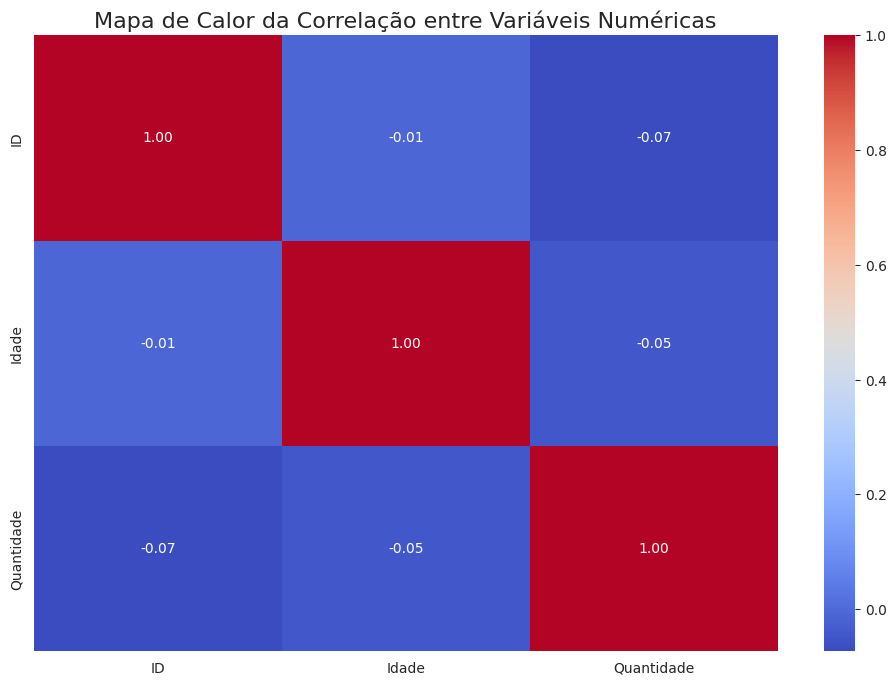

In [14]:
# Gráfico 2: Heatmap de Correlação
plt.figure(figsize=(12, 8))
# Selecionando apenas colunas numéricas para o heatmap
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=16)
plt.savefig('heatmap_correlacao.png')
plt.show()

---
#### **6. Entrega**

Para finalizar a atividade, o DataFrame limpo deve ser salvo em um novo arquivo CSV.

In [17]:
# Exportando o DataFrame limpo para um novo arquivo CSV
df.to_csv('base_limpa.csv', index=False, sep=';', decimal=',')
print("O arquivo 'base_limpa.csv' foi salvo com sucesso!")

O arquivo 'base_limpa.csv' foi salvo com sucesso!
